<a href="https://colab.research.google.com/github/Rishit003/BDCE-ML-Task-1/blob/main/BDCE_ML_Task_1_Rishit_Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Task - 1**
## **By Rishit Singh - 2313103**

## **1. Importing the data set**

Importing the pandas, numpy, seaborn and matplotlib packages

In [3]:
import pandas
import numpy
import seaborn
import matplotlib

Importing the csv file as data

In [5]:
data = pandas.read_csv("user_behavior_dataset_task1.csv")

## **2. Initial impressions of the given data set**

Viewing some data

In [6]:
print(data.head())
print(data.tail())
print(data.describe())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                     393.0   
1        2       OnePlus 9          Android                     268.0   
2        3    Xiaomi Mi 11          Android                     154.0   
3        4  Google Pixel 5          Android                     239.0   
4        5       iPhone 12              iOS                     187.0   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                   1872.0   
1                         4.7                   1331.0   
2                         4.0                    761.0   
3                         4.8                   1676.0   
4                         4.3                   1367.0   

   Number of Apps Installed  Data Usage (MB/day)   Age  Gender  \
0                      67.0               1122.0  40.0    Male   
1                      42.0                944.0  47.0  Female   
2             

Pandas command to print out the number of unique values for different data variables.

In [7]:
data.nunique()

,0
User ID,671
Device Model,5
Operating System,2
App Usage Time (min/day),380
Screen On Time (hours/day),107
Battery Drain (mAh/day),596
Number of Apps Installed,86
Data Usage (MB/day),560
Age,42
Gender,2


We can conclude from above that our data set contains behaviour of smartphone users accross 5 different smartphone models. We can also conclude that each user is assigned a behaviour class from 1-5.

## **3. Cleaning the data set**

Checking for null values

In [8]:
data.isnull().sum()

,0
User ID,0
Device Model,2
Operating System,0
App Usage Time (min/day),8
Screen On Time (hours/day),11
Battery Drain (mAh/day),12
Number of Apps Installed,13
Data Usage (MB/day),7
Age,10
Gender,0


Checking how many user entries are containg null values.

In [9]:
clean_data = data.dropna(axis = 0)

In [10]:
clean_data.nunique()

,0
User ID,615
Device Model,5
Operating System,2
App Usage Time (min/day),361
Screen On Time (hours/day),107
Battery Drain (mAh/day),563
Number of Apps Installed,86
Data Usage (MB/day),525
Age,42
Gender,2


We can see that there are 56 user entries which has  null values. Since the number is pretty low, it will not effect our analysis when dropped.

In [11]:
data=clean_data

## **4. Visualising the data set**

#### **1. Correlational Matrix**

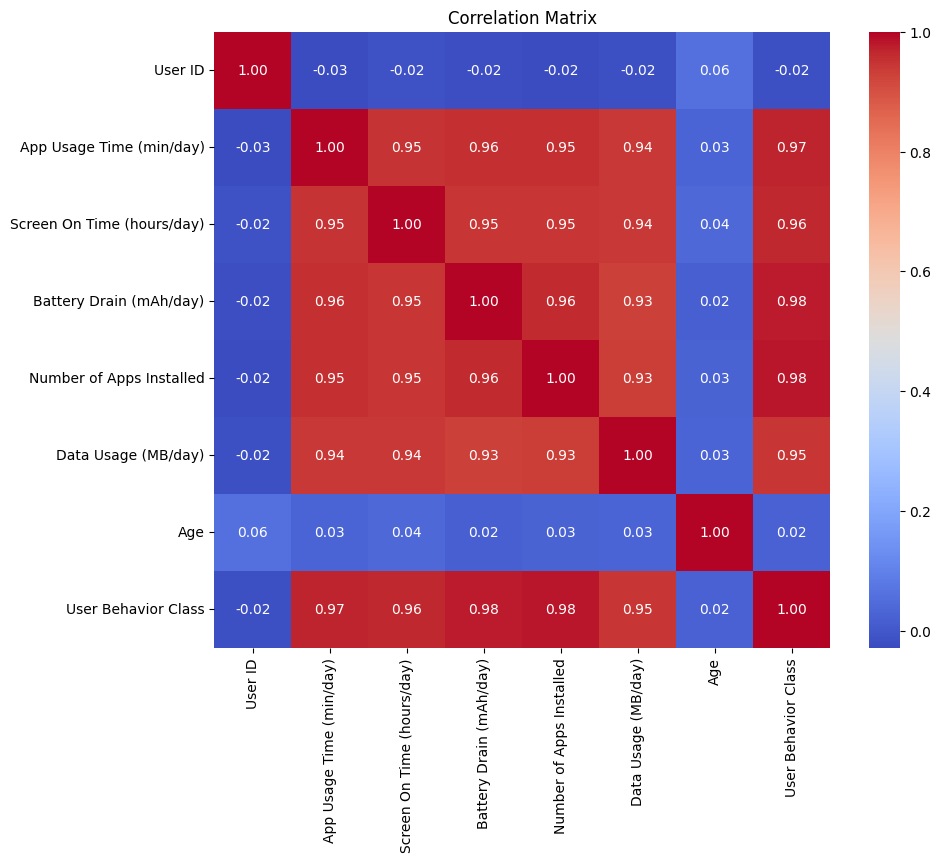

In [58]:
correlation=data.corr(numeric_only=True)
matplotlib.pyplot.figure(figsize=(10, 8))
seaborn.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, xticklabels=correlation.columns, yticklabels=correlation.columns)
matplotlib.pyplot.title('Correlation Matrix')
matplotlib.pyplot.show()

#### **2. Demographic distribution accross the 5 Device Models**

##### **Distribution according to Gender**

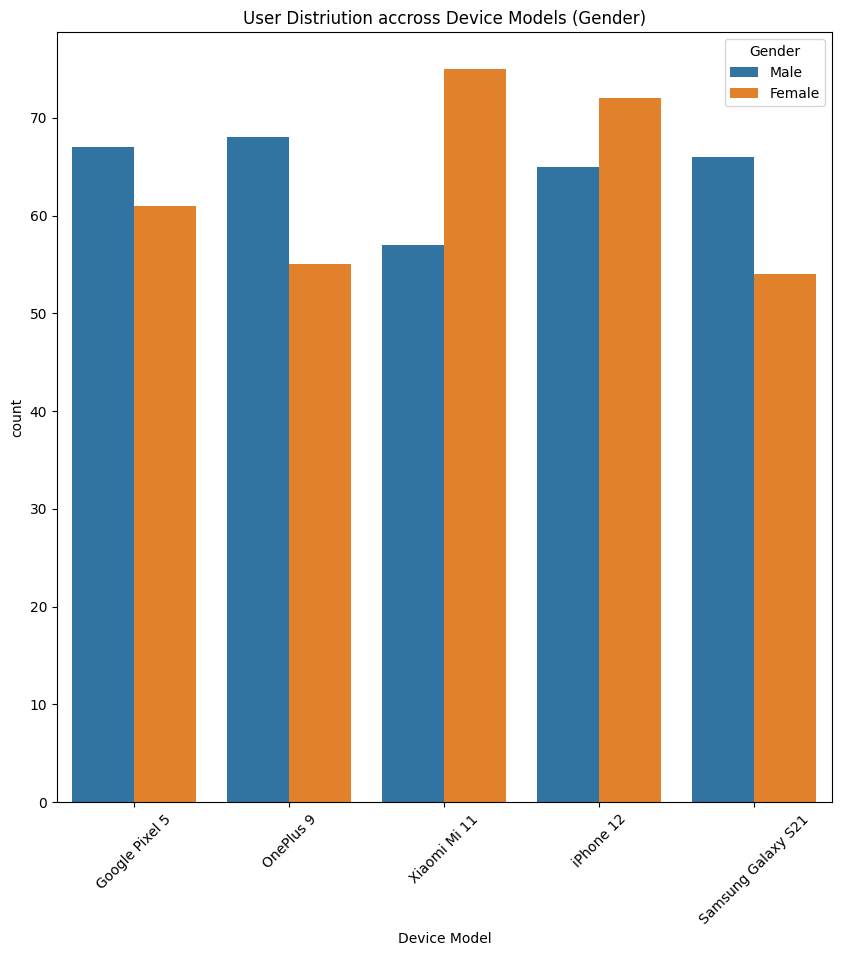

In [47]:
matplotlib.pyplot.figure(figsize=(10, 10))
seaborn.countplot(x='Device Model', data=data, hue='Gender')
matplotlib.pyplot.title('User Distriution accross Device Models (Gender)')
matplotlib.pyplot.xticks(rotation=45)
matplotlib.pyplot.show()

**Conclusion** - The given data set contains almost equally distributed number of users in each device, with Xiaomi Mi 11 and iPhone 12 having a slightly larger demographic in females.

##### **Distribution according to Age**

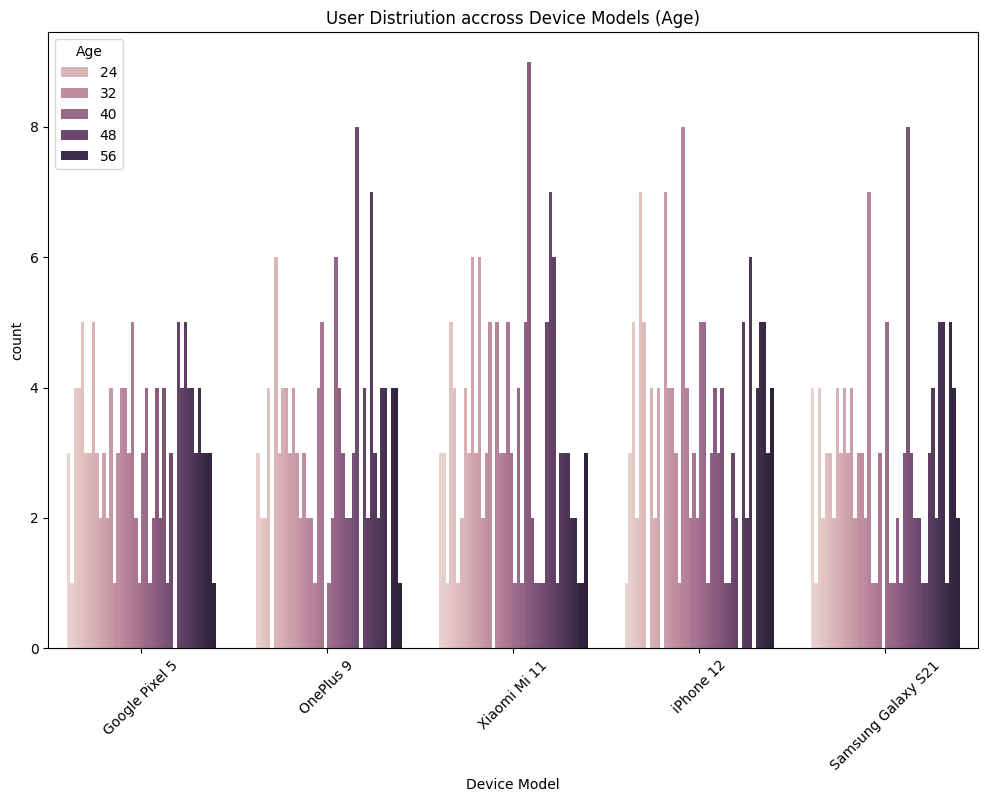

In [48]:
matplotlib.pyplot.figure(figsize=(12, 8))
seaborn.countplot(x='Device Model', data=data, hue='Age')
matplotlib.pyplot.title('User Distriution accross Device Models (Age)')
matplotlib.pyplot.xticks(rotation=45)
matplotlib.pyplot.show()

**Conclusions -**<br>

**1. Google Pixel 5** - has a equally distributed demographic<br>
**2. One Plus 9** - more popular in the middle aged group ranging from 40-48<br>
**3. Xiaomi Mi 11** - most popular in middle aged groups<br>
**4. iPhone 12** - most popular in the younger as well as older age group<br>
**5. Samsung Galaxy S21** - with a slight larger middle aged group


#### **3. Screen Time**

### **5. Summary of Findings: -**

####1.   **Age** <br>

####2.   **Screen Time** <br>